In [3]:
import pandas as pd
import yfinance as yf
import datetime 

start = '2019-01-01'
end = '2024-01-01'

ts = yf.download('TSLA' ,start=start, end=end)
print (ts)

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   20.406668   21.008667   19.920000   20.674667   20.674667   
2019-01-03   20.466667   20.626667   19.825333   20.024000   20.024000   
2019-01-04   20.400000   21.200001   20.181999   21.179333   21.179333   
2019-01-07   21.448000   22.449333   21.183332   22.330667   22.330667   
2019-01-08   22.797333   22.934000   21.801332   22.356667   22.356667   
...                ...         ...         ...         ...         ...   
2023-12-22  256.760010  258.220001  251.369995  252.539993  252.539993   
2023-12-26  254.490005  257.970001  252.910004  256.609985  256.609985   
2023-12-27  258.350006  263.339996  257.519989  261.440002  261.440002   
2023-12-28  263.660004  265.130005  252.710007  253.179993  253.179993   
2023-12-29  255.100006  255.190002  247.429993  248.479996  248.479996   

               Volume  
Date         

In [5]:
ts.info

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   20.406668   21.008667   19.920000   20.674667   20.674667   
2019-01-03   20.466667   20.626667   19.825333   20.024000   20.024000   
2019-01-04   20.400000   21.200001   20.181999   21.179333   21.179333   
2019-01-07   21.448000   22.449333   21.183332   22.330667   22.330667   
2019-01-08   22.797333   22.934000   21.801332   22.356667   22.356667   
...                ...         ...         ...         ...         ...   
2023-12-22  256.760010  258.220001  251.369995  252.539993  252.539993   
2023-12-26  254.490005  257.970001  252.910004  256.609985  256.609985   
2023-12-27  258.350006  263.339996  257.519989  261.440002  261.440002   
2023-12-28  263.660004  265.130005  252.710007  253.179993  253.179993   
2023-12-29  255.100006  255.190002  247.429993  248.479996  248.479996   

     

In [7]:
ts.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500
2019-01-09,22.366667,22.900000,22.098000,22.568666,22.568666,81493500
2019-01-10,22.293333,23.025999,22.119333,22.997999,22.997999,90846000
2019-01-11,22.806000,23.227333,22.584667,23.150667,23.150667,75586500
2019-01-14,22.825333,22.833332,22.266666,22.293333,22.293333,78709500


In [9]:
ts.tail(70)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-21,257.850006,260.859985,254.210007,255.699997,255.699997,119531000
2023-09-22,257.399994,257.790009,244.479996,244.880005,244.880005,127524100
2023-09-25,243.380005,247.100006,238.309998,246.990005,246.990005,104636600
2023-09-26,242.979996,249.550003,241.660004,244.119995,244.119995,101993600
2023-09-27,244.259995,245.330002,234.580002,240.500000,240.500000,136597200
...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400


In [11]:
ts = ts[["Open"]].copy()

In [13]:
ts.describe()

,Open
count,1258.000000
mean,170.939232
std,108.455419
min,12.073333
25%,49.244500
50%,200.045006
75%,251.392498
max,411.470001


ARIMA model is desribed nt 3 terms (p,d,q):
- p is the order of the AR term 
- d is the number of differencing required to make it stationary 
- q is the order of the MA term


# Stationarity
We need to see if the data is stationary or not for that, if not we need to perform differencing operations needed to make the series stationary.

and the minimum number of differencing operations needed to make the series stationary needs to be imputed into our ARIMA model.


# ADF test 
For checking the staionarity we are going to perform Augmented Dickey fuler test.

The null hypthesis is that the time series is non-stationary. So,if the p-value of this test is less than the significance level(0.05) than we can reject the null hypothesis and infer that the time series is indeed statinary.

Lets see 

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-value : ", dftest[1])
    print("3. Num of lags : ", dftest[2])
    print("4. Num of Observation used for ADF Regression and Critical value calculation :",dftest[3])
    print("5. Critical Value :")
    for key, val in dftest[4].items():
        print ("\t",key, ": ",val)

In [17]:
ad_test(ts['Open'])

1. ADF :  -1.500702223024647
2. P-value :  0.533163930661055
3. Num of lags :  1
4. Num of Observation used for ADF Regression and Critical value calculation : 1256
5. Critical Value :
	 1% :  -3.4355671297788666
	 5% :  -2.8638438984080117
	 10% :  -2.5679966213893057


## So, from this ADF test p-vlaue = 0.533163930661055. Therefor, we can conclude that as p-value is > 0.05 the time series is not stationary.

To find the order of differencing we can use *Autocorrelation Function (ACF)*plots from stats model and this plots tells us how many terms are required to remove any auto-correlation in the series.

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

In [25]:
import matplotlib.pyplot as plt
import time

plt.style.available
%matplotlib inline

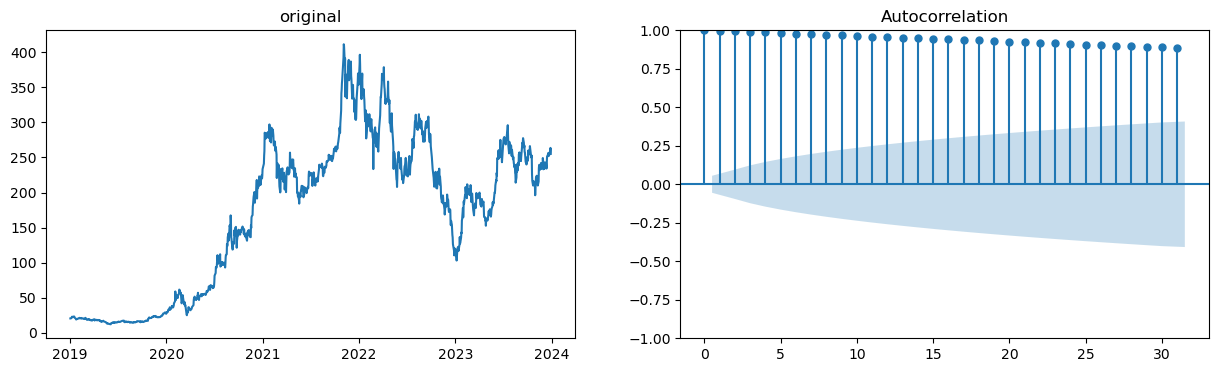

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

ax1.plot(ts.Open)
ax1.set_title("original")
plot_acf(ts.Open, ax=ax2);

Here we can see the ariginal and autocorrelation graph

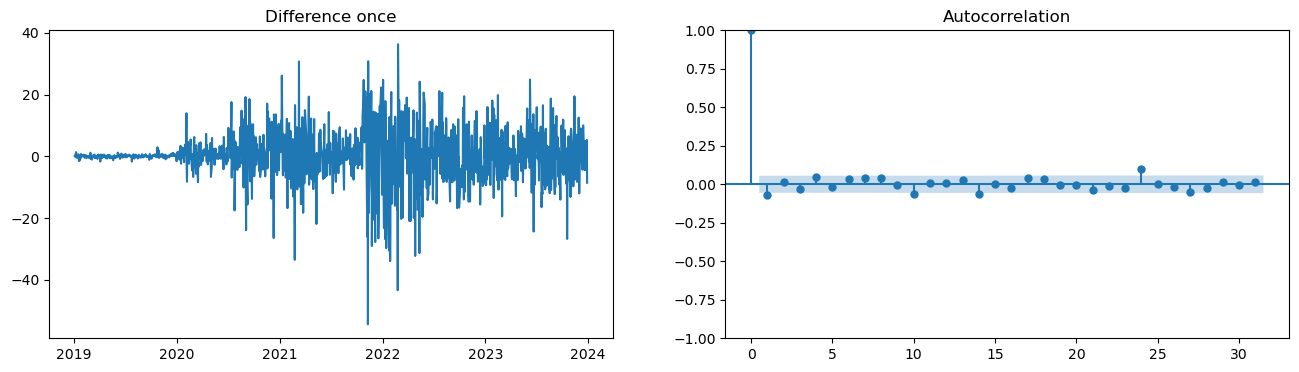

In [30]:
diff = ts.Open.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

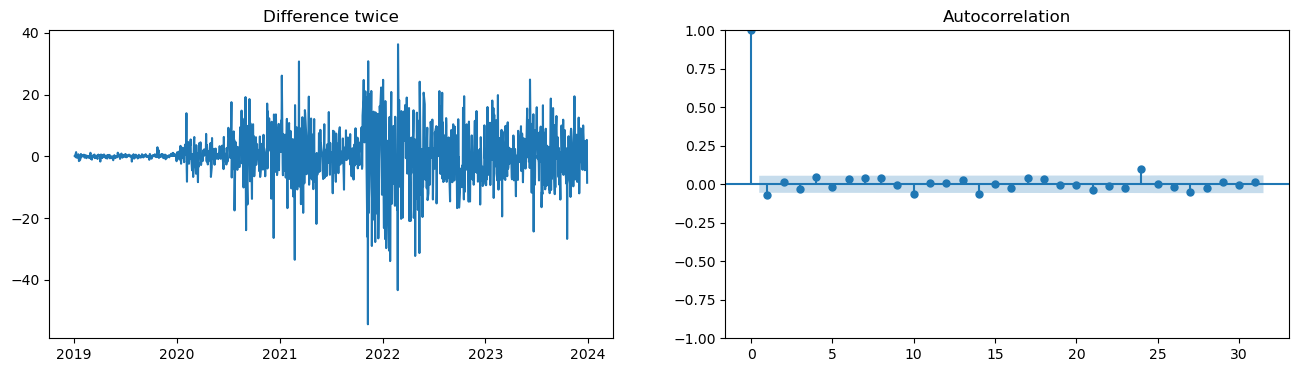

In [32]:
diff = ts.Open.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2);

As we performed difference twice we can see that both the differeces are same. 

In [35]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [37]:
from pmdarima.arima.utils import ndiffs

In [39]:
ndiffs(ts.Open, test='adf')

1

So, from this we can conclude that we only require 1 time differencing to make this time series stationary.
we Have got 
# d = 1 
we need to fine p, q 

SO, P referes to the number of lags to used as predictors.

We can find out the this Partial Autocorrelation (PACF) as this represents the corelation between series and its lags.

In [43]:
from statsmodels.graphics.tsaplots import plot_pacf

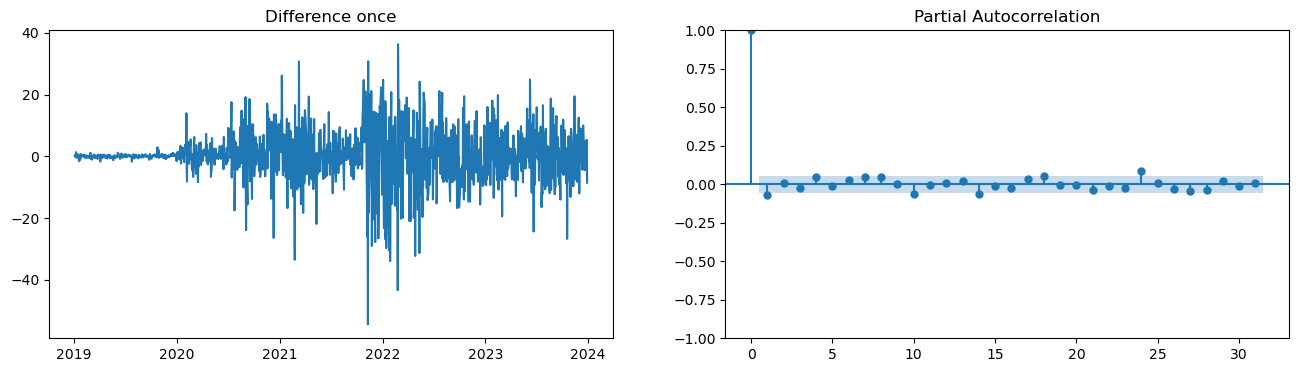

In [45]:
diff = ts.Open.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

By looking at the Partial Autocorelation graph we can depict that the 
# p = 1
as it is significantly over the lag number 1 is obve the significance line. 

Now we have to find q, 
q is the order of the moving avg term. It referes to the number of lagged forecast errors that should go into ARIMA model
and we have to look at the ACF plot for the number of A terms.

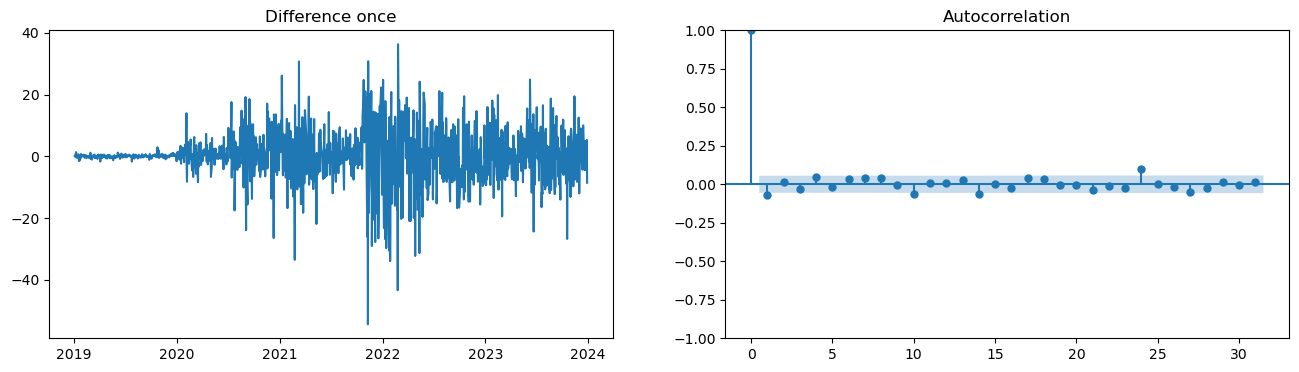

In [49]:
diff = ts.Open.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

Here also we will take the 
# q = 1

as that is least value showing error

In [52]:
from  statsmodels.tsa.arima.model import ARIMA
ts.index = pd.to_datetime(ts.index)
ts = ts.asfreq('D')

model = ARIMA(ts.Open, order=(1, 1, 1))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1823
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4435.932
Date:                Sat, 12 Oct 2024   AIC                           8877.863
Time:                        13:10:28   BIC                           8894.386
Sample:                    01-02-2019   HQIC                          8883.959
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0015      0.116      0.013      0.989      -0.227       0.230
ma.L1         -0.2082      0.111     -1.884      0.060      -0.425       0.008
sigma2        56.5862      1.220     46.383      0.0

As we have order of (1,1,1) we have got the values 1 value for AR and MA

(array([9.43116687e-05, 9.43116687e-05, 6.60181681e-04, 1.50898670e-03,
        5.28145345e-03, 2.26348005e-02, 6.58295448e-02, 1.70704120e-02,
        4.62127177e-03, 8.48805018e-04]),
 array([-53.27240648, -44.84383586, -36.41526524, -27.98669463,
        -19.55812401, -11.1295534 ,  -2.70098278,   5.72758784,
         14.15615845,  22.58472907,  31.01329968]),
 <BarContainer object of 10 artists>)

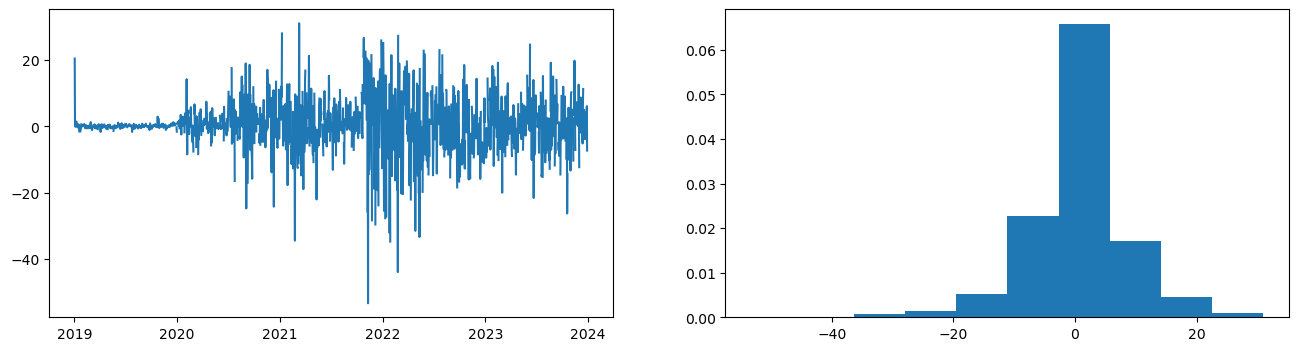

In [55]:
# plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

In [57]:
result.predict(
    start=1800,
    end=1820,
    dynamic=False,
)

Date
2023-12-07    241.130522
2023-12-08    241.460558
2023-12-09    240.515872
2023-12-10    240.516253
2023-12-11    240.516254
2023-12-12    242.536289
2023-12-13    239.354136
2023-12-14    235.257246
2023-12-15    239.989608
2023-12-16    248.889606
2023-12-17    248.886014
2023-12-18    248.886008
2023-12-19    253.331663
2023-12-20    253.449367
2023-12-21    255.798811
2023-12-22    252.704635
2023-12-23    255.923285
2023-12-24    255.921989
2023-12-25    255.921987
2023-12-26    255.921987
2023-12-27    254.592614
Freq: D, Name: predicted_mean, dtype: float64

In [59]:
ts.tail(30)

,Open
Date,
2023-11-30,245.139999
2023-12-01,233.139999
2023-12-02,NaN
2023-12-03,NaN
2023-12-04,235.750000
2023-12-05,233.869995
2023-12-06,242.919998
2023-12-07,241.550003
2023-12-08,240.270004


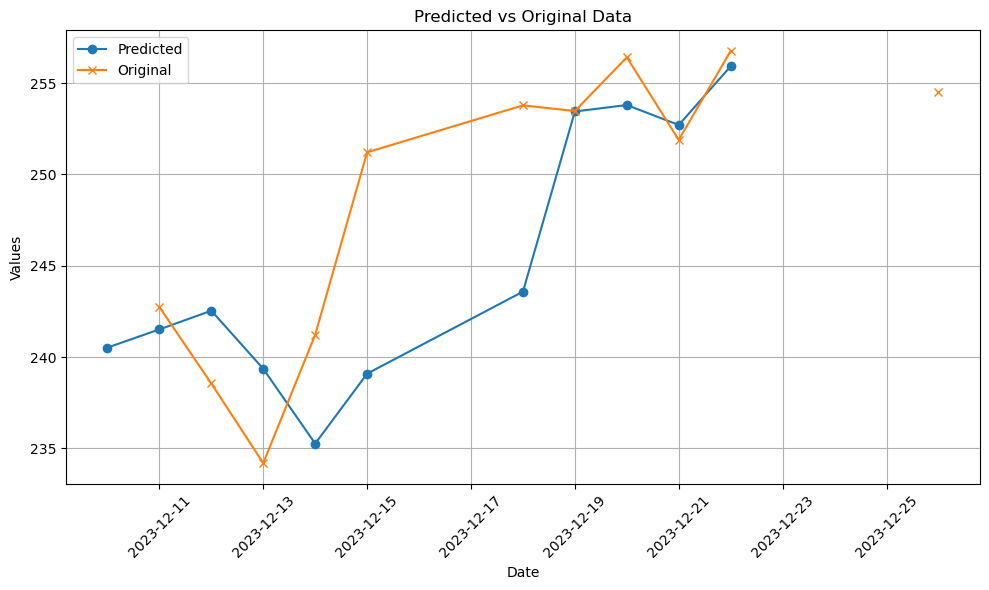

In [67]:
# Recreating the predicted data as per your screenshots
predicted_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-12-07', periods=18, freq='D'),
    'predicted_mean': [
        241.130522, 241.460558, 240.515872, 240.516254, 241.512254, 
        242.536289, 239.354136, 235.257246, 239.089068, 248.889606,
        248.886014, 243.579881, 253.443967, 253.798811, 252.704635, 
        255.921897, 255.921987, 254.592614
    ]
})

# Recreating the original data as per your screenshots
original_data = pd.DataFrame({
    'Date': pd.to_datetime([
        '2023-12-10', '2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14',
        '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
        '2023-12-22', '2023-12-25', '2023-12-26'
    ]),
    'Open': [None, 242.74, 238.55, 234.19, 241.22, 251.21, 253.78, 253.47, 256.41, 
             251.89, 256.76, None, 254.49]
})

# Filtering the predicted data to match the dates of the original data
predicted_data_filtered = predicted_data[predicted_data['Date'].isin(original_data['Date'])]

# Plotting the adjusted data
plt.figure(figsize=(10, 6))
plt.plot(predicted_data_filtered['Date'], predicted_data_filtered['predicted_mean'], label='Predicted', marker='o')
plt.plot(original_data['Date'], original_data['Open'], label='Original', marker='x')

# Labeling the plot
plt.title('Predicted vs Original Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
# now lets see the predeicted chart
pred = result.predict(
    start=1400,
    end=1820,
    dynamic=False,
)

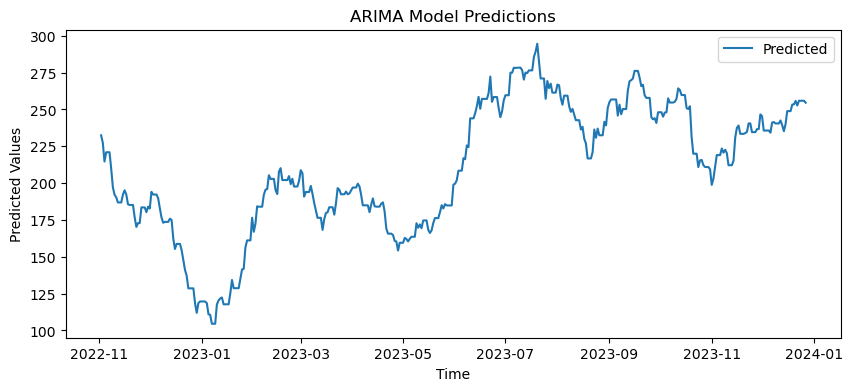

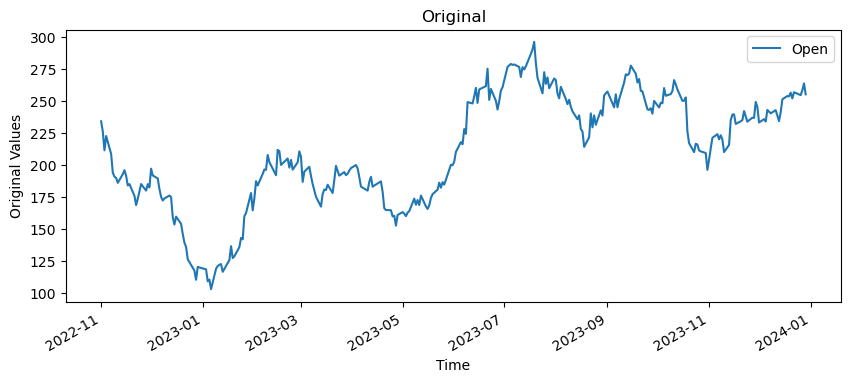

In [90]:
# Plot the predictions
plt.figure(figsize=(10, 4))
plt.plot(pred, label='Predicted')
plt.title('ARIMA Model Predictions')
plt.xlabel('Time')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

start = '2022-11-01'
end = '2024-01-01'


ts1['Open'].plot(figsize=(10,4))
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Original Values')
plt.legend()
plt.show()

Above one is the predicted values I got Using ARIMA and 

Below is the graph showing the original values

# conclusion 
After comparing the predicted one with original one we can see that there is not much difference and we can say that our predicted values are aligning prefctly with the original one.